In [172]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import json

%matplotlib inline

In [5]:
df = pd.read_csv('D:\\3_Study\\1_Python\\house_price_prediction\\Bengaluru_House_Data.csv')

In [6]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.shape

(13320, 9)

In [10]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [12]:
df1 = df.drop(['area_type', 'society', 'availability'], axis='columns')
print(df1.shape)
df1.head()

(13320, 6)


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [13]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [32]:
balcony_unique_values = df1['balcony'].unique()
balcony_unique_values = balcony_unique_values[np.logical_not(np.isnan(balcony_unique_values))]
balcony_median = np.median(balcony_unique_values)
balcony_median

1.5

In [34]:
df1['balcony'] = df1['balcony'].fillna(balcony_median)

In [35]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [36]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [37]:
df2.shape

(13246, 6)

In [38]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [42]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

c:\users\pranav khekare\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df3 = df2.drop(['size'], axis='columns')

In [46]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [47]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [48]:
df3['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [53]:
def is_float(number):
    try:
        float(number)
    except:
        return False
    return True

In [55]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,4125Perch,9.0,1.5,265.000,9
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [60]:
def range_to_avg(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [61]:
range_to_avg('2130-2400')

2265.0

In [65]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(range_to_avg)
print(df4.head(10))
df4.loc[30]

                   location  total_sqft  bath  balcony   price  BHK
0  Electronic City Phase II      1056.0   2.0      1.0   39.07    2
1          Chikka Tirupathi      2600.0   5.0      3.0  120.00    4
2               Uttarahalli      1440.0   2.0      3.0   62.00    3
3        Lingadheeranahalli      1521.0   3.0      1.0   95.00    3
4                  Kothanur      1200.0   2.0      1.0   51.00    2
5                Whitefield      1170.0   2.0      1.0   38.00    2
6          Old Airport Road      2732.0   4.0      1.5  204.00    4
7              Rajaji Nagar      3300.0   4.0      1.5  600.00    4
8              Marathahalli      1310.0   3.0      1.0   63.25    3
9              Gandhi Bazar      1020.0   6.0      1.5  370.00    6


location      Yelahanka
total_sqft         2475
bath                  4
balcony               0
price               186
BHK                   4
Name: 30, dtype: object

In [66]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [67]:
len(df5['location'].unique())

1304

In [71]:
df5['location'] = df5['location'].apply(lambda x: x.strip())

location_statistics = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_statistics

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [73]:
len(location_statistics[location_statistics < 20])

1145

In [74]:
location_less_than_20 = location_statistics[location_statistics < 20]
location_less_than_20

location
Kalyan nagar         19
HRBR Layout          19
Pai Layout           19
Kaggalipura          19
OMBR Layout          19
                     ..
LIC Colony            1
Kuvempu Layout        1
Kumbhena Agrahara     1
Kudlu Village,        1
1 Annasandrapalya     1
Name: location, Length: 1145, dtype: int64

In [75]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_less_than_20 else x)
len(df5['location'].unique())

149

In [77]:
df5.head(20)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,other,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,1.5,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,1.5,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,1020.0,6.0,1.5,370.00,6,36274.509804


In [79]:
df5[df5['total_sqft']/df5['BHK'] < 300].head()
df5.shape

(13246, 7)

In [80]:
df6 = df5[~(df5['total_sqft']/df5['BHK'] < 300)]
df6.shape

(12502, 7)

In [84]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [86]:
def price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        mean = np.mean(sub_df['price_per_sqft'])
        std_div = np.std(sub_df['price_per_sqft'])
        reduce_df = sub_df[(sub_df['price_per_sqft']>(mean-std_div)) & 
                           (sub_df['price_per_sqft'] <= (mean+std_div))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    return df_out

df7 = price_per_sqft_outliers(df6)
df7.shape

(10418, 7)

In [87]:
df7.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,10418.000000,10418.000000,10418.000000,10418.000000,10418.000000,10418.000000
mean,1501.811194,2.477251,1.588885,89.262937,2.573815,5599.064529
std,873.799733,0.986085,0.786770,79.158266,0.901916,2105.756448
min,300.000000,1.000000,0.000000,10.000000,1.000000,1379.310345
25%,1105.000000,2.000000,1.000000,48.752500,2.000000,4230.769231
50%,1280.000000,2.000000,2.000000,67.000000,2.000000,5164.126838
75%,1650.000000,3.000000,2.000000,100.000000,3.000000,6406.399157
max,30400.000000,16.000000,3.000000,2200.000000,16.000000,21875.000000


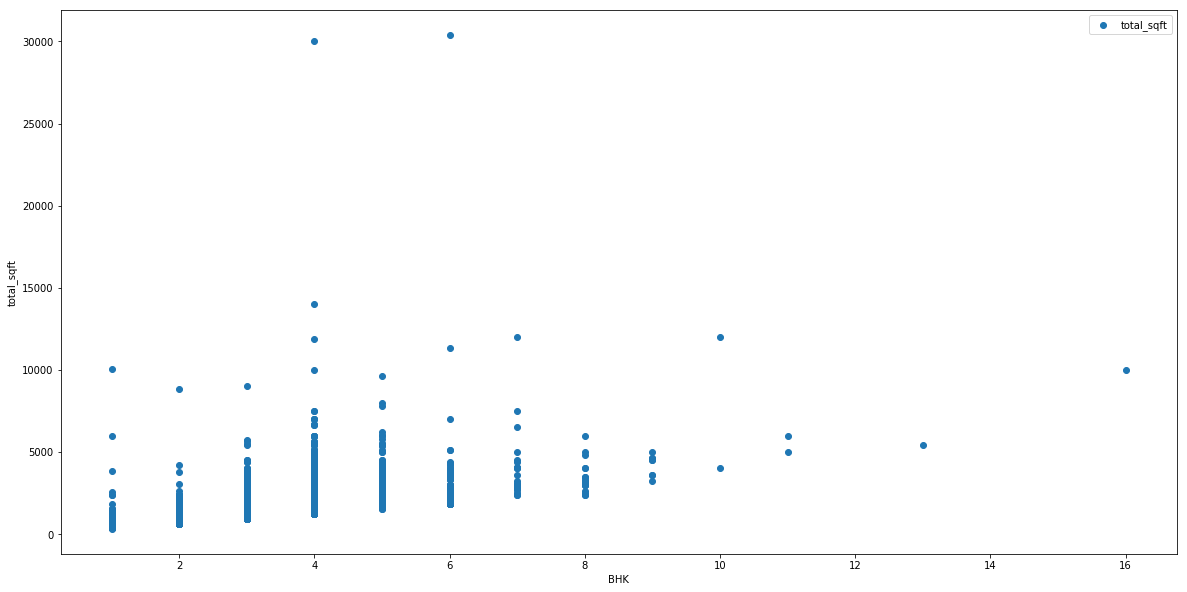

In [96]:
def plot_sqft_per_bhk(df, x, y):
    plt.figure(figsize=(20, 10))
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()
    
plot_sqft_per_bhk(df7, 'BHK', 'total_sqft')

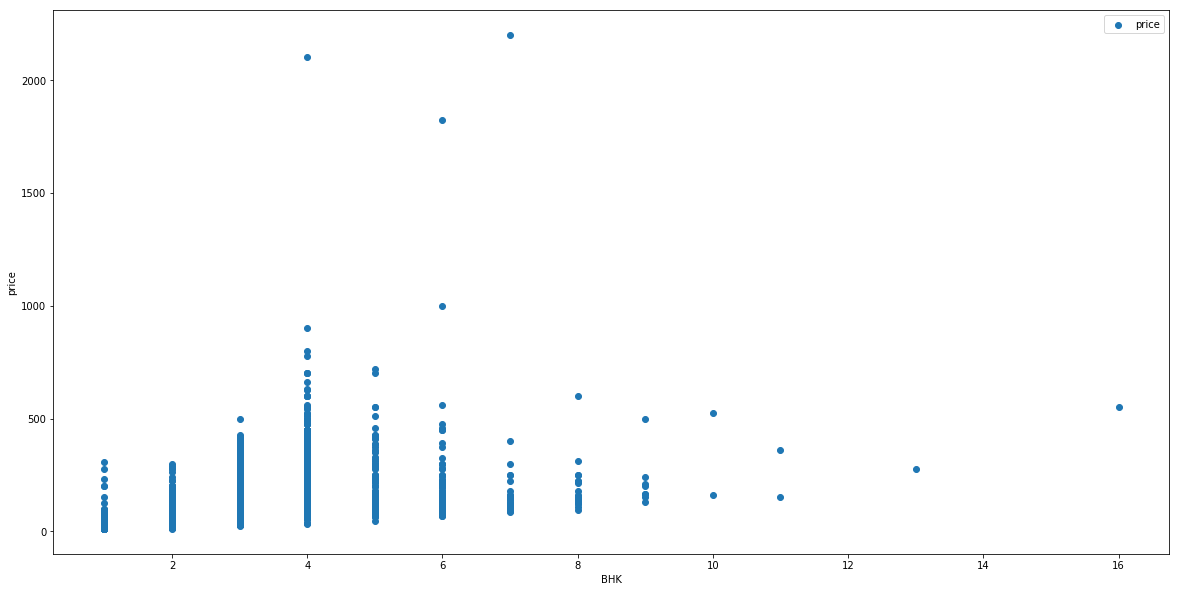

In [97]:
plot_sqft_per_bhk(df7, 'BHK', 'price')

In [93]:
bhk_16_df = df7[df7['BHK'] == 16]
bhk_16_df

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
8005,other,10000.0,16.0,1.5,550.0,16,5500.0


In [98]:
bhk_16_df = df7[df7['price'] > 1000]
bhk_16_df

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
4298,Malleshwaram,12000.0,7.0,3.0,2200.0,7,18333.333333
7750,other,30000.0,4.0,1.5,2100.0,4,7000.000000
10337,other,30400.0,4.0,2.0,1824.0,6,6000.000000


In [100]:
df7.shape

(10418, 7)

In [101]:
df8 = df7[df7['price'] < 1300]
df8.shape

(10415, 7)

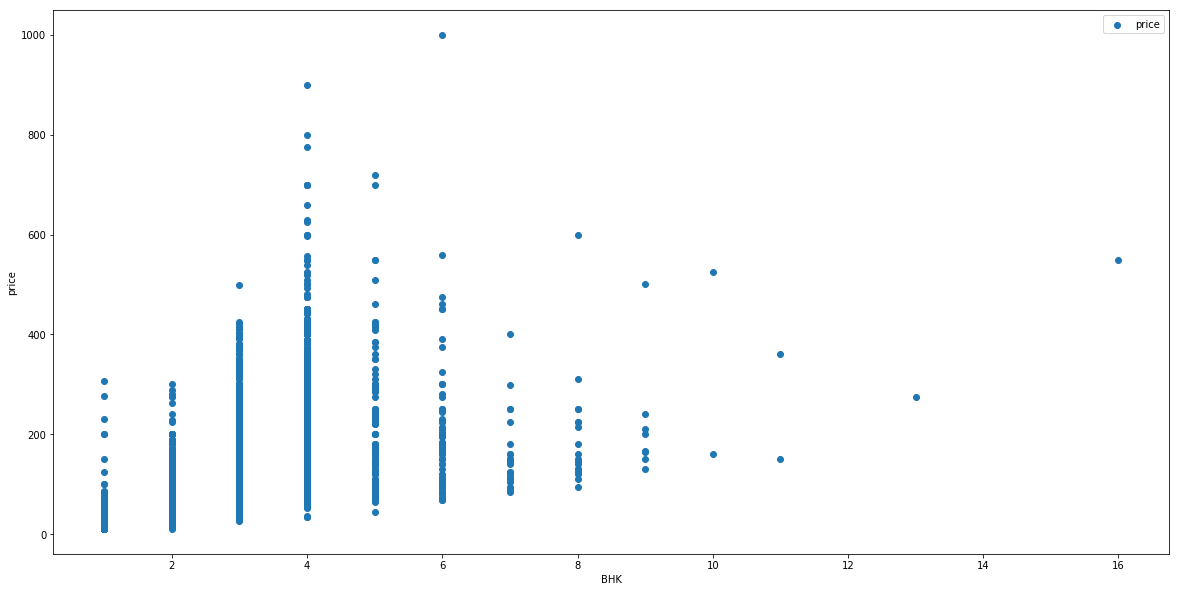

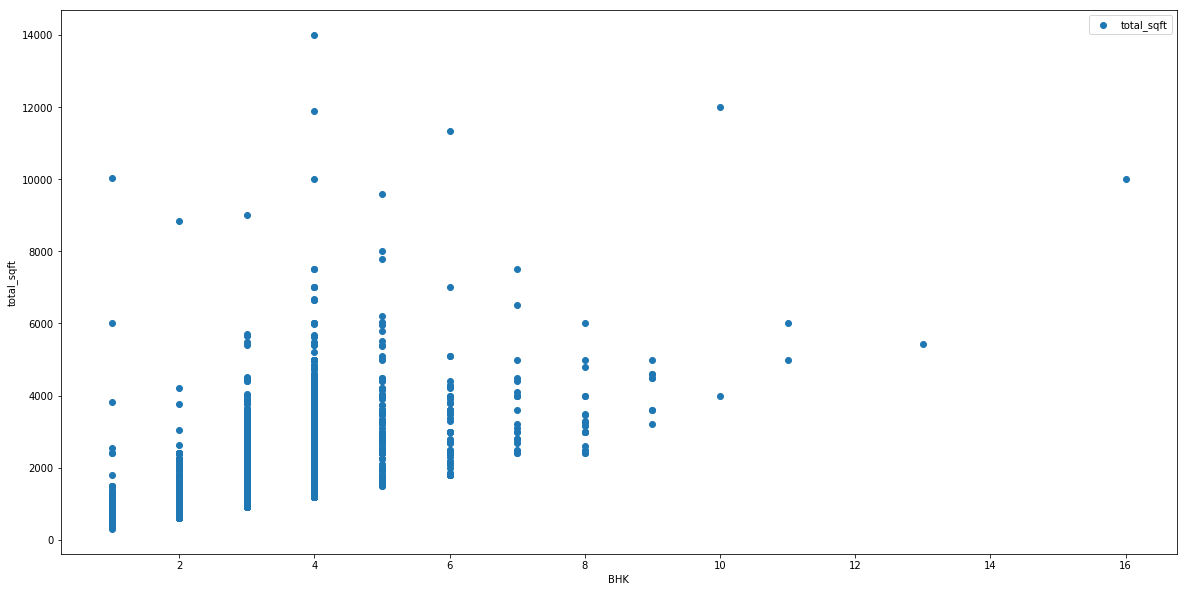

In [103]:
plot_sqft_per_bhk(df8, 'BHK', 'price')
plot_sqft_per_bhk(df8, 'BHK', 'total_sqft')

In [107]:
less_sqft_tahn_16_more_price = df8[df8['BHK']< 16] 
less_sqft_tahn_16_more_price = less_sqft_tahn_16_more_price[less_sqft_tahn_16_more_price['total_sqft'] < 10000]
less_sqft_tahn_16_more_price = less_sqft_tahn_16_more_price[df8['price'] > 550]
less_sqft_tahn_16_more_price

c:\users\pranav khekare\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
3123,Indira Nagar,3250.0,8.0,1.0,600.0,8,18461.538462
3133,Indira Nagar,4000.0,4.0,1.0,700.0,4,17500.000000
4002,Koramangala,5985.0,4.0,1.5,775.0,4,12949.039265
4022,Koramangala,6000.0,4.0,0.0,625.0,4,10416.666667
4971,Rajaji Nagar,3526.0,4.0,1.0,558.0,4,15825.297788
4992,Rajaji Nagar,3526.0,4.0,3.0,598.0,4,16959.727737
7282,other,5500.0,4.0,1.5,600.0,4,10909.090909
7606,other,4750.0,5.0,1.5,600.0,4,12631.578947
7673,other,4800.0,5.0,3.0,629.0,4,13104.166667
7954,other,6200.0,5.0,1.5,720.0,5,11612.903226


In [110]:
df9 = pd.concat([df8, less_sqft_tahn_16_more_price]).drop_duplicates(keep=False)
df9.shape

(9033, 7)

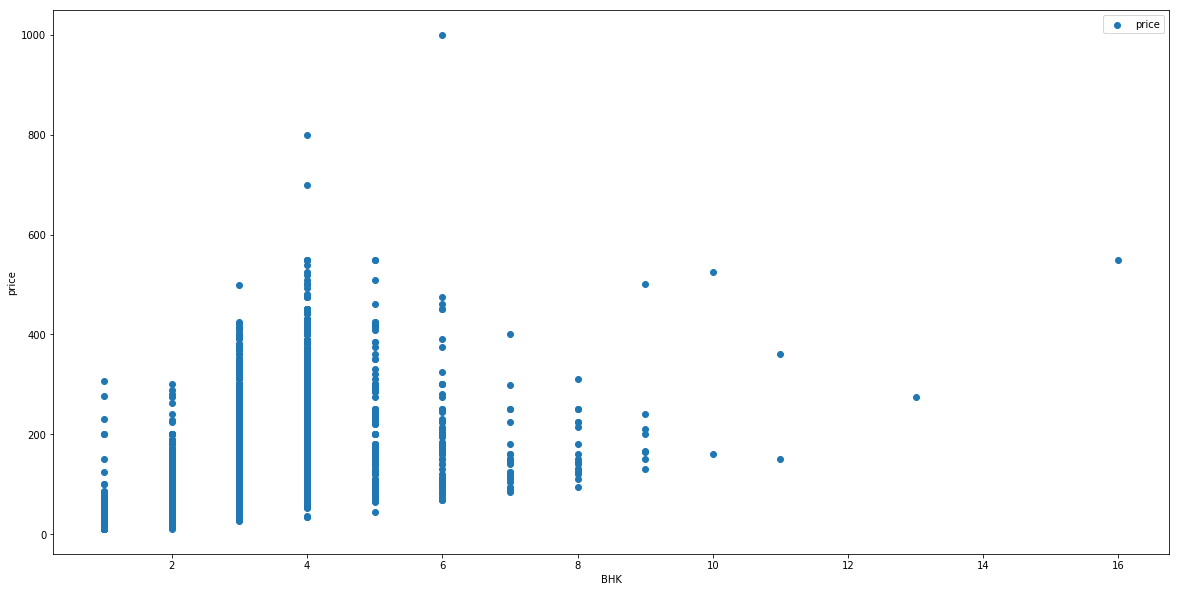

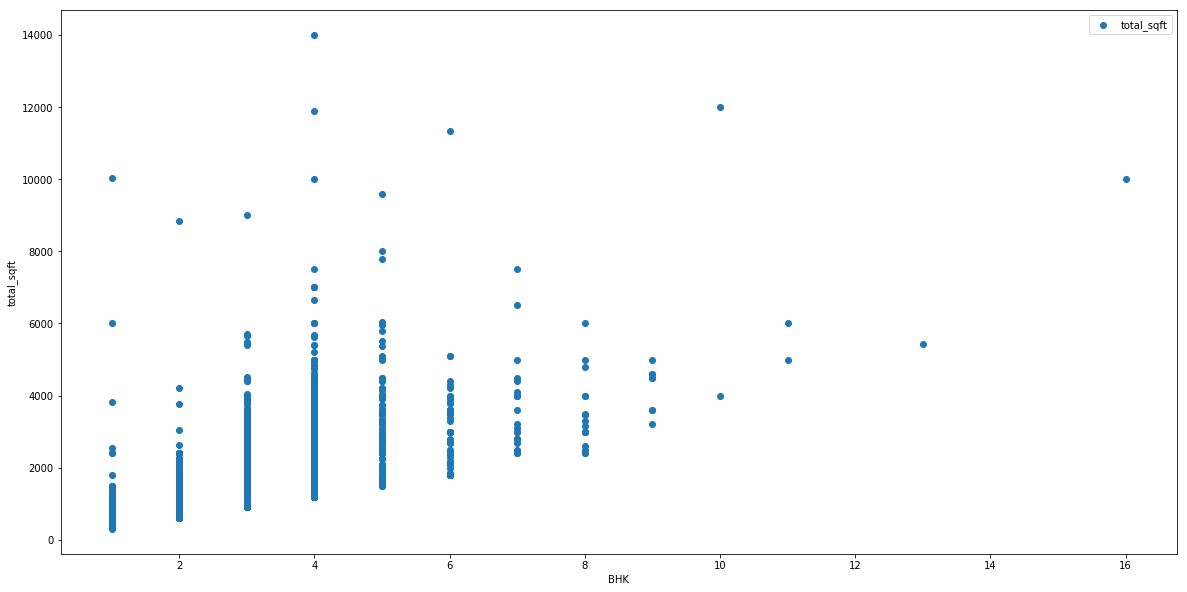

In [111]:
plot_sqft_per_bhk(df9, 'BHK', 'price')
plot_sqft_per_bhk(df9, 'BHK', 'total_sqft')

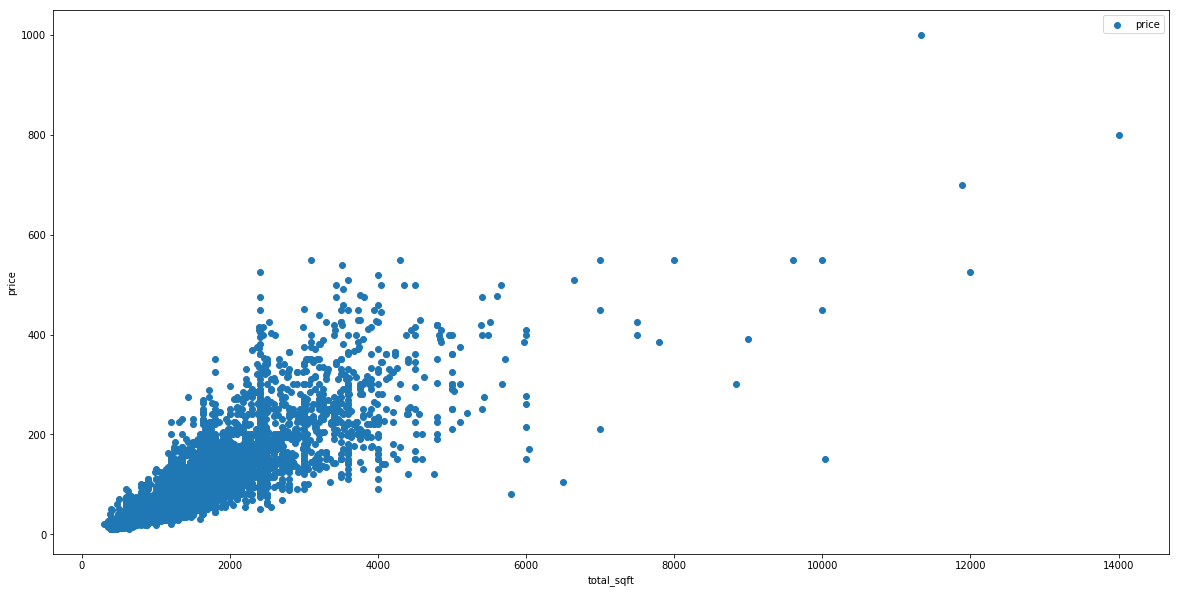

In [149]:
plot_sqft_per_bhk(df9, 'total_sqft', 'price')

In [123]:
bath_greater_than_bhk = df9[df9['bath'] > df9['BHK'] + 1]
bath_greater_than_bhk

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
21,2nd Stage Nagarbhavi,3000.0,8.0,3.0,451.0,6,15033.333333
22,2nd Stage Nagarbhavi,2400.0,8.0,3.0,450.0,6,18750.000000
516,BTM 2nd Stage,1260.0,5.0,1.0,185.0,3,14682.539683
909,Begur Road,2464.5,6.0,0.0,118.0,4,4787.989450
1054,Binny Pete,2465.0,5.0,2.0,234.0,3,9492.900609
...,...,...,...,...,...,...,...
9914,other,7000.0,8.0,1.5,450.0,4,6428.571429
9937,other,6652.0,6.0,1.0,510.0,4,7666.867108
10112,other,600.0,4.0,1.0,70.0,2,11666.666667
10192,other,5656.0,5.0,0.0,499.0,3,8822.489392


In [124]:
df10 = pd.concat([df9, bath_greater_than_bhk]).drop_duplicates(keep=False)
df10.shape

(8945, 7)

In [125]:
df10.head(10)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,1st Phase JP Nagar,2825.0,4.0,3.0,250.0,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,8906.666667
2,1st Phase JP Nagar,1500.0,5.0,1.5,85.0,5,5666.666667
3,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,10169.491525
4,1st Phase JP Nagar,2024.0,3.0,1.5,157.0,3,7756.916996
5,1st Phase JP Nagar,2059.0,3.0,2.0,225.0,3,10927.634774
6,1st Phase JP Nagar,1394.0,2.0,1.0,100.0,2,7173.601148
7,1st Phase JP Nagar,1077.0,2.0,2.0,93.0,2,8635.097493
8,1st Phase JP Nagar,1566.0,2.0,0.0,180.0,2,11494.252874
9,1st Phase JP Nagar,840.0,2.0,2.0,50.0,1,5952.380952


In [126]:
df11 = df10.drop(['price_per_sqft'], axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,BHK
0,1st Phase JP Nagar,2825.0,4.0,3.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,1.5,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3
4,1st Phase JP Nagar,2024.0,3.0,1.5,157.0,3


In [129]:
dummies = pd.get_dummies(df11['location'])
df12 = pd.concat([df11, dummies.drop(['other'], axis='columns')], axis='columns').drop(['location'], axis='columns')
df12.head()

,total_sqft,bath,balcony,price,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,3.0,250.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,1.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,1.5,85.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,1.0,210.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024.0,3.0,1.5,157.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
df12.shape

(8945, 153)

In [130]:
df12.columns

Index(['total_sqft', 'bath', 'balcony', 'price', 'BHK', '1st Phase JP Nagar',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Uttarahalli', 'Varthur', 'Vidyaranyapura', 'Vijayanagar',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yeshwanthpur'],
      dtype='object', length=153)

In [131]:
X = df12.drop(['price'], axis='columns')
Y = df12['price']

In [135]:
Y.head()

0    250.0
1    167.0
2     85.0
3    210.0
4    157.0
Name: price, dtype: float64

In [134]:
X.head()

,total_sqft,bath,balcony,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,3.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,1.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,1.5,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,1.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024.0,3.0,1.5,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=10)

In [140]:
train_X

,total_sqft,bath,balcony,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
5933,1330.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6863,1322.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4495,1200.0,2.0,0.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1751,1150.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8144,1380.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5712,2273.0,3.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8519,922.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573,1025.0,2.0,1.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8521,1123.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
train_Y

5933     75.0
6863     80.0
4495     69.0
1751     35.0
8144     75.0
        ...  
5712    159.0
8519     70.0
1573     47.0
8521     64.0
1513     42.0
Name: price, Length: 7156, dtype: float64

In [143]:
linear_reg = LinearRegression()
linear_reg.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
linear_reg.score(test_X, test_Y)

0.7474805424410955

In [148]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.74748054, 0.74205447, 0.79330302, 0.78019885, 0.79792834])

In [157]:
def find_best_model_using_gridsearchcv(X, Y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {'normalize': [True, False]}  
        },
        
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random'],
                'min_samples_leaf' : [4, 6, 10, 20, 50]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, Y)
        scores.append({
            'model' : algo,
            'best_score' : gscv.best_score_,
            'best_params' : gscv.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [158]:
output_df = find_best_model_using_gridsearchcv(X, Y)
output_df

,model,best_score,best_params
0,linear_regression,0.772193,{'normalize': False}
1,lasso,0.694734,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.731857,"{'criterion': 'mse', 'min_samples_leaf': 4, 's..."


In [162]:
def predict_price(location, sqft, bath, balcony, bhk):
    loc_idx = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_idx >= 0:
        x[loc_idx] = 1
    
    return linear_reg.predict([x])[0]

In [168]:
predict_price('1st Phase JP Nagar', 1000, 2, 1, 2)

92.32954258485192

In [169]:
predict_price('Indira Nagar', 1000, 2, 1, 2)

154.61739792409907

In [171]:
with open('banglore_house_price_model.pickle', 'wb') as f:
    pickle.dump(linear_reg, f)

In [173]:
columns = {'data_cols' : [col.lower() for col in X.columns]}

In [176]:
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))